# References
https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

# Load Dataset

In [1]:
!ls

EDA_vietnamesedataset.ipynb  models  task_1.py	test_load_pkl.py
Flask-Docker-App	     out     task_2.py


In [2]:
import sys
!{sys.executable} -m pip install matplotlib pandas nltk wordcloud


In [3]:
import os
import pandas as pd

data_dir = os.path.join("..", "data", "sentiment_analysis_viet_raw")
file_parts=["negative_data.csv", "neutral_data.csv", "positive_data.csv"]

full_df = []
for file_part in file_parts:
    file_path = os.path.join(data_dir, file_part)
    df = pd.read_csv(file_path)
    full_df.append(df)

df = pd.concat(full_df)

In [4]:
print(df.head())

  Rate                                             Review  Label
0  4.0   Mình thề là mình ko thể cảm nổi đồ ăn ở aeon ...   -1.0
1  3.8   Đôi khi thèm lên là bất chấp nắng nóng phi Và...   -1.0
2  3.8   Ngõ treo biển cafe trứng đúng kiểu phố cổ hà ...   -1.0
3  3.8   Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huâ...   -1.0
4  2.2   Mình là người Hà Nội và cũng cực kỳ khó tính ...   -1.0


# Check Nulls

In [5]:
df.isnull().sum()

Rate      0
Review    0
Label     4
dtype: int64

In [6]:
df.dropna(inplace=True)

# Overview of Whole Dataset

In [7]:
print("Number of reviews with labels:", len(df))

Number of reviews with labels: 5910


In [8]:
review_split = df["Review"].str.split()
review_lengths = review_split.str.len()
print("Review length mean:", review_lengths.mean())
print("Review length std:", review_lengths.std())
print("Number of review words:", review_lengths.sum())
df["Review Lengths"] = review_lengths
df["Review Split"] = review_split
display(df)

Review length mean: 79.0434856175973
Review length std: 82.6570985608246
Number of review words: 467147


,Rate,Review,Label,Review Lengths,Review Split
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon ...,-1.0,62,"[Mình, thề, là, mình, ko, thể, cảm, nổi, đồ, ă..."
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và...,-1.0,95,"[Đôi, khi, thèm, lên, là, bất, chấp, nắng, nón..."
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà ...,-1.0,55,"[Ngõ, treo, biển, cafe, trứng, đúng, kiểu, phố..."
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huâ...,-1.0,108,"[Mình, thấy, địa, chỉ, cafe, Giảng, ở, Nguyễn,..."
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính ...,-1.0,136,"[Mình, là, người, Hà, Nội, và, cũng, cực, kỳ, ..."
...,...,...,...,...,...
2637,10.0,Phục vụ tốt ah,1.0,4,"[Phục, vụ, tốt, ah]"
2638,10.0,Đồ uống siêu ngon,1.0,4,"[Đồ, uống, siêu, ngon]"
2639,10.0,Nhân viên siêu siêu nhiệt tình,1.0,6,"[Nhân, viên, siêu, siêu, nhiệt, tình]"
2640,9.0,thật là toẹt,1.0,3,"[thật, là, toẹt]"


In [9]:
from nltk.probability import FreqDist
review_words = review_split.tolist()
all_review_words = [word for review in review_words for word in review]
print("Number of words:", len(all_review_words))
freqdist = FreqDist(all_review_words)
print("Number of unique words:", len(freqdist))

Number of words: 467147
Number of unique words: 10978


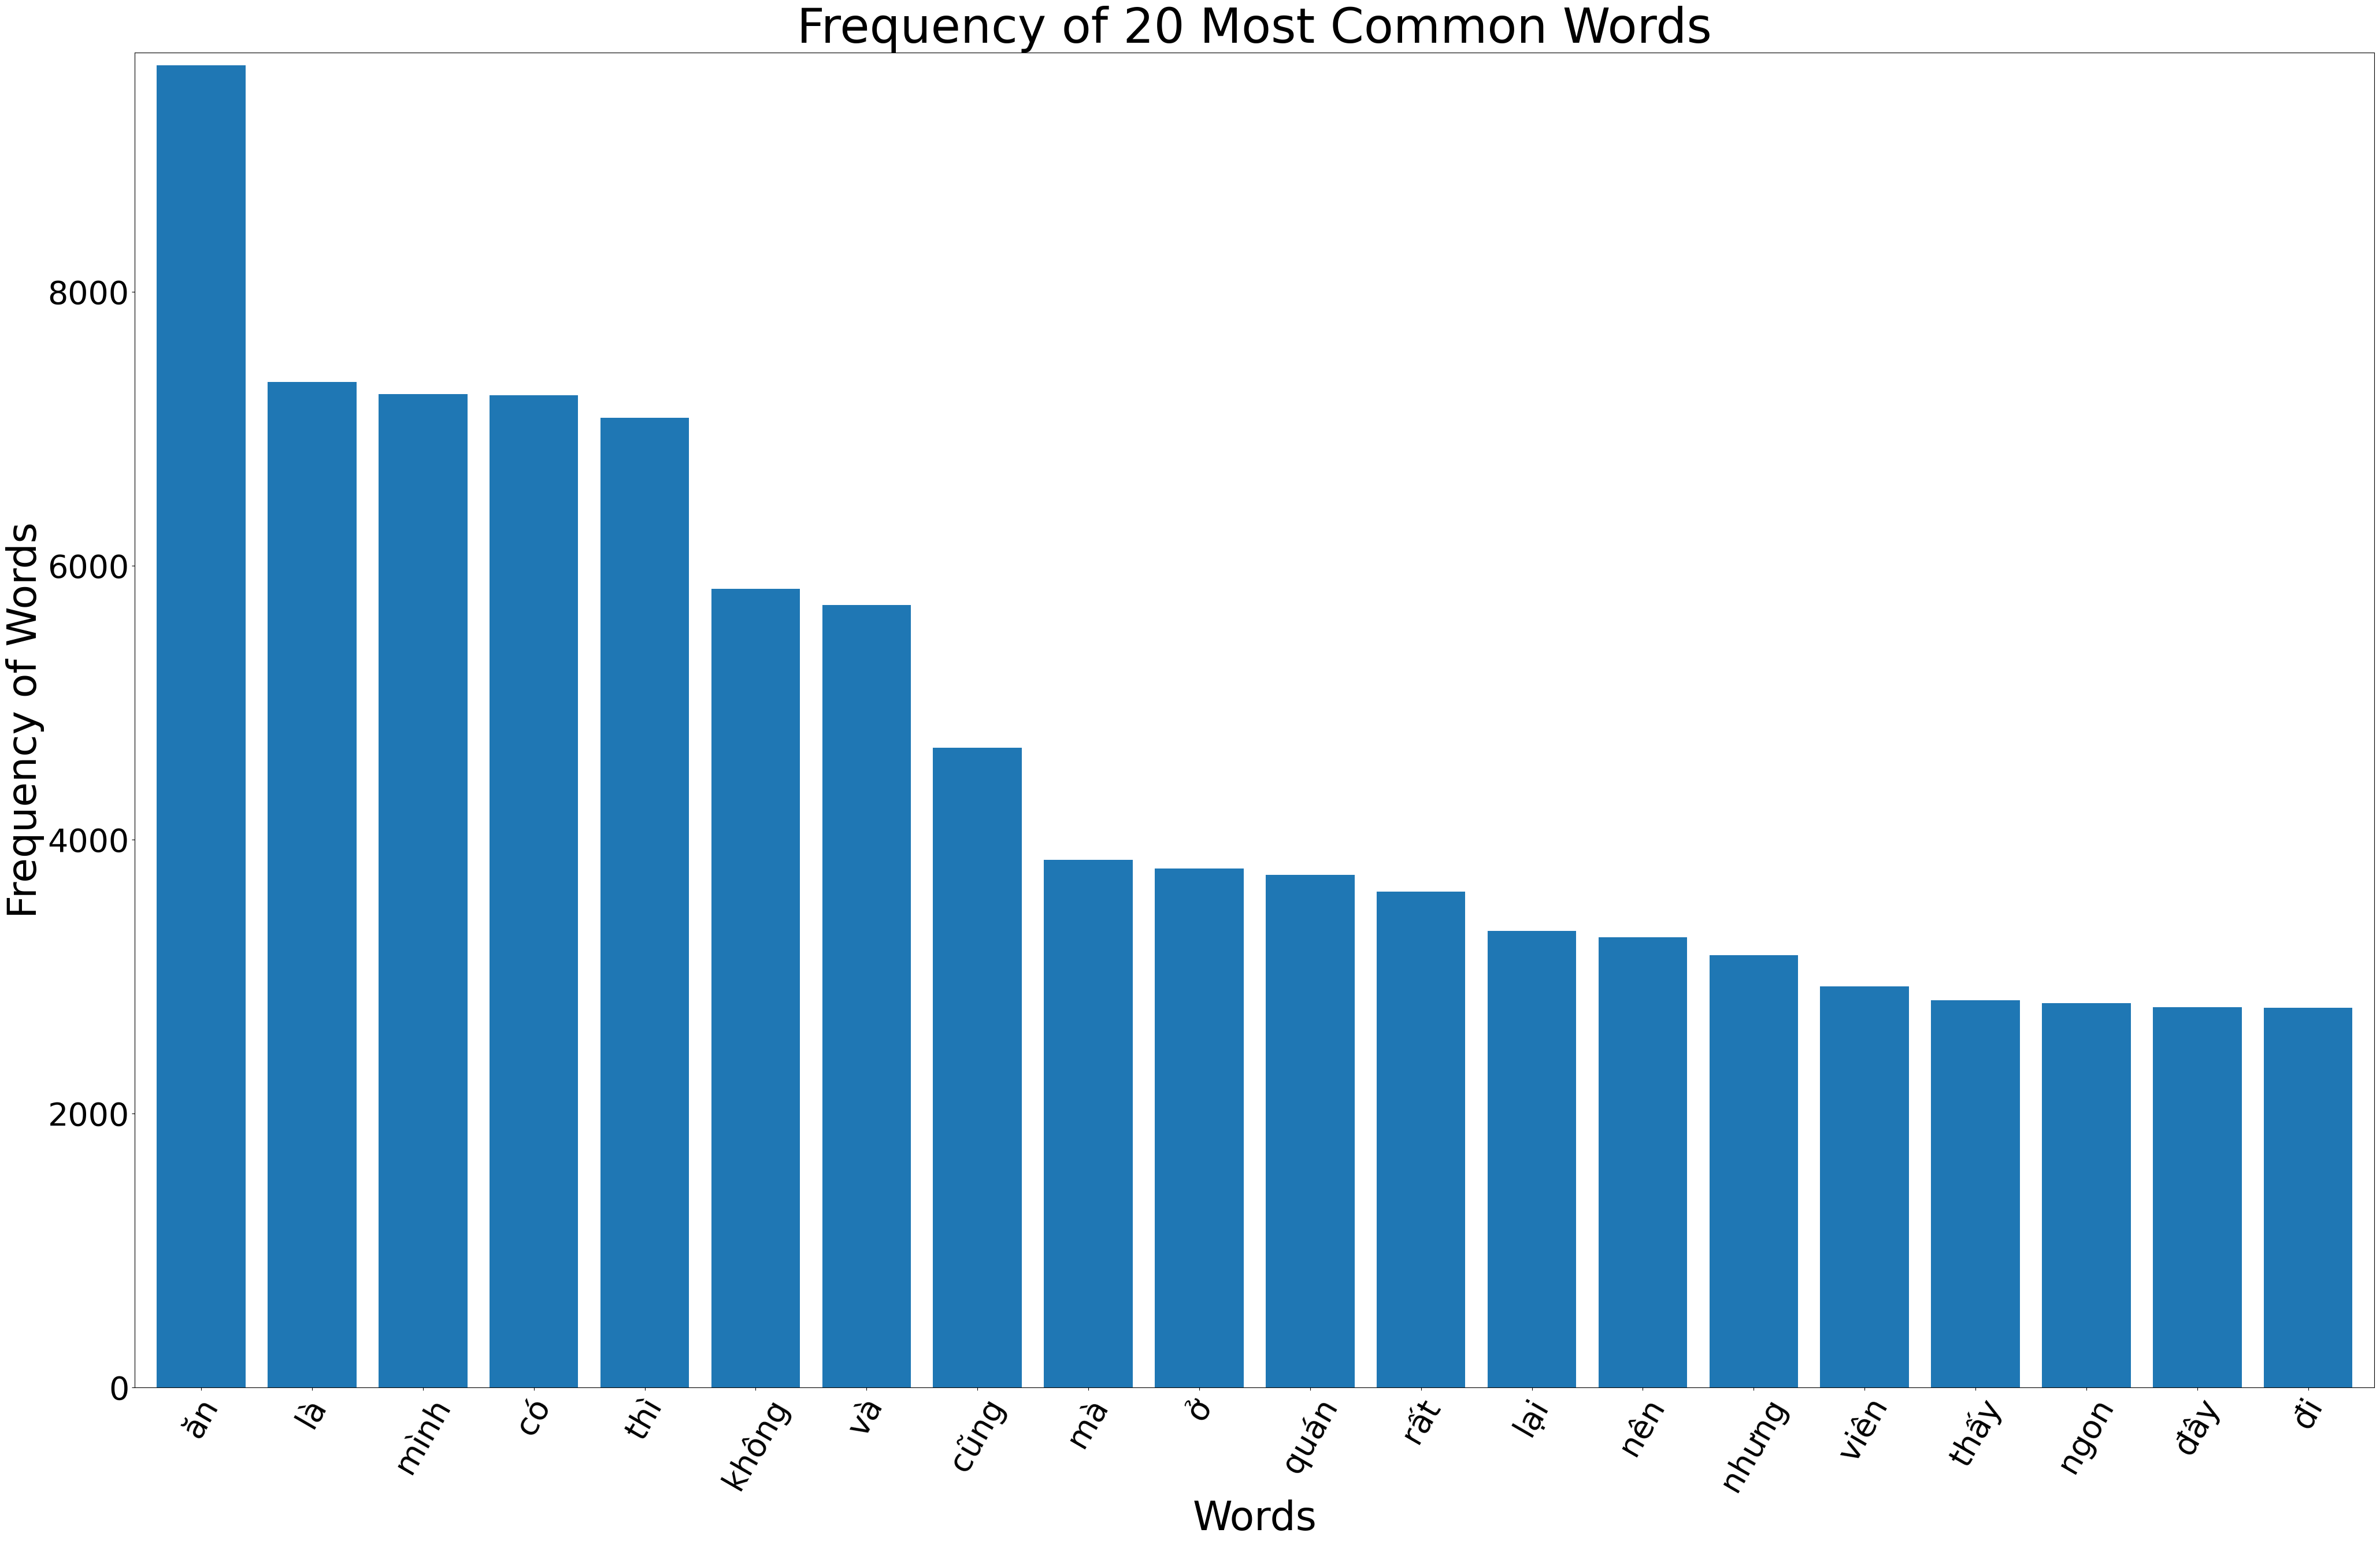

In [10]:
import matplotlib
import matplotlib.pyplot as plt

mostcommon = freqdist.most_common(20)
x, y = zip(*mostcommon)
plt.figure(figsize=(50,30))
plt.margins(0.01)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=60)
plt.show()

In [11]:
df["Rate"] = df["Rate"].astype("float")
print("Avg rating:")
df["Rate"].mean()

Avg rating:


6.242131979695431

In [12]:
cnts = df["Label"].value_counts()
print("Sentiment Label Counts:")
display(cnts)

Sentiment Label Counts:


 1.0    2779
-1.0    2416
 0.0     715
Name: Label, dtype: int64

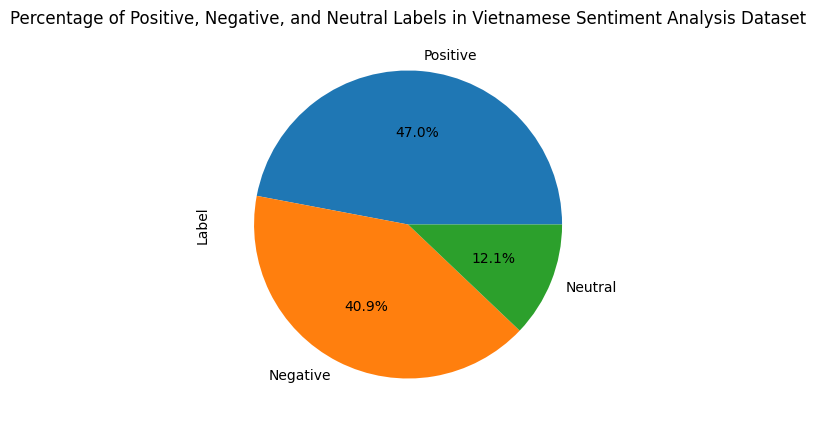

In [13]:
pie_plot = cnts.plot.pie(y=cnts, labels=["Positive", "Negative", "Neutral"], figsize=(5, 5), autopct='%1.1f%%', title="Percentage of Positive, Negative, and Neutral Labels in Vietnamese Sentiment Analysis Dataset")

Reviews are primarily Positive or Negative, 

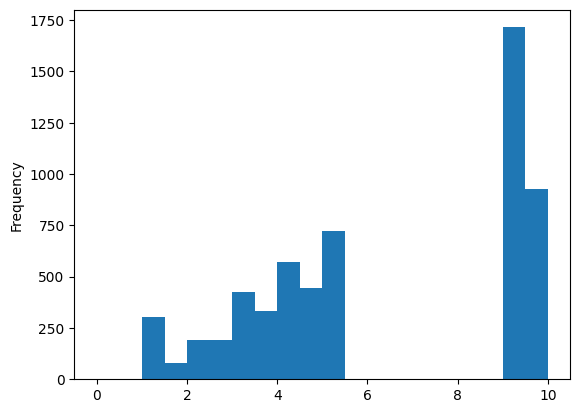

In [14]:
# Rating Distribution
rating_dist_plot = df["Rate"].plot.hist(bins=20)

# Overview Grouped by Labels

In [15]:
df_groupby_label = df.groupby(by="Label")
group_by_label_mean = df_groupby_label.mean(numeric_only=True)
display(group_by_label_mean)

,Rate,Review Lengths
Label,,
-1.0,3.317632,91.695364
0.0,4.769510,64.135664
1.0,9.163512,71.879813


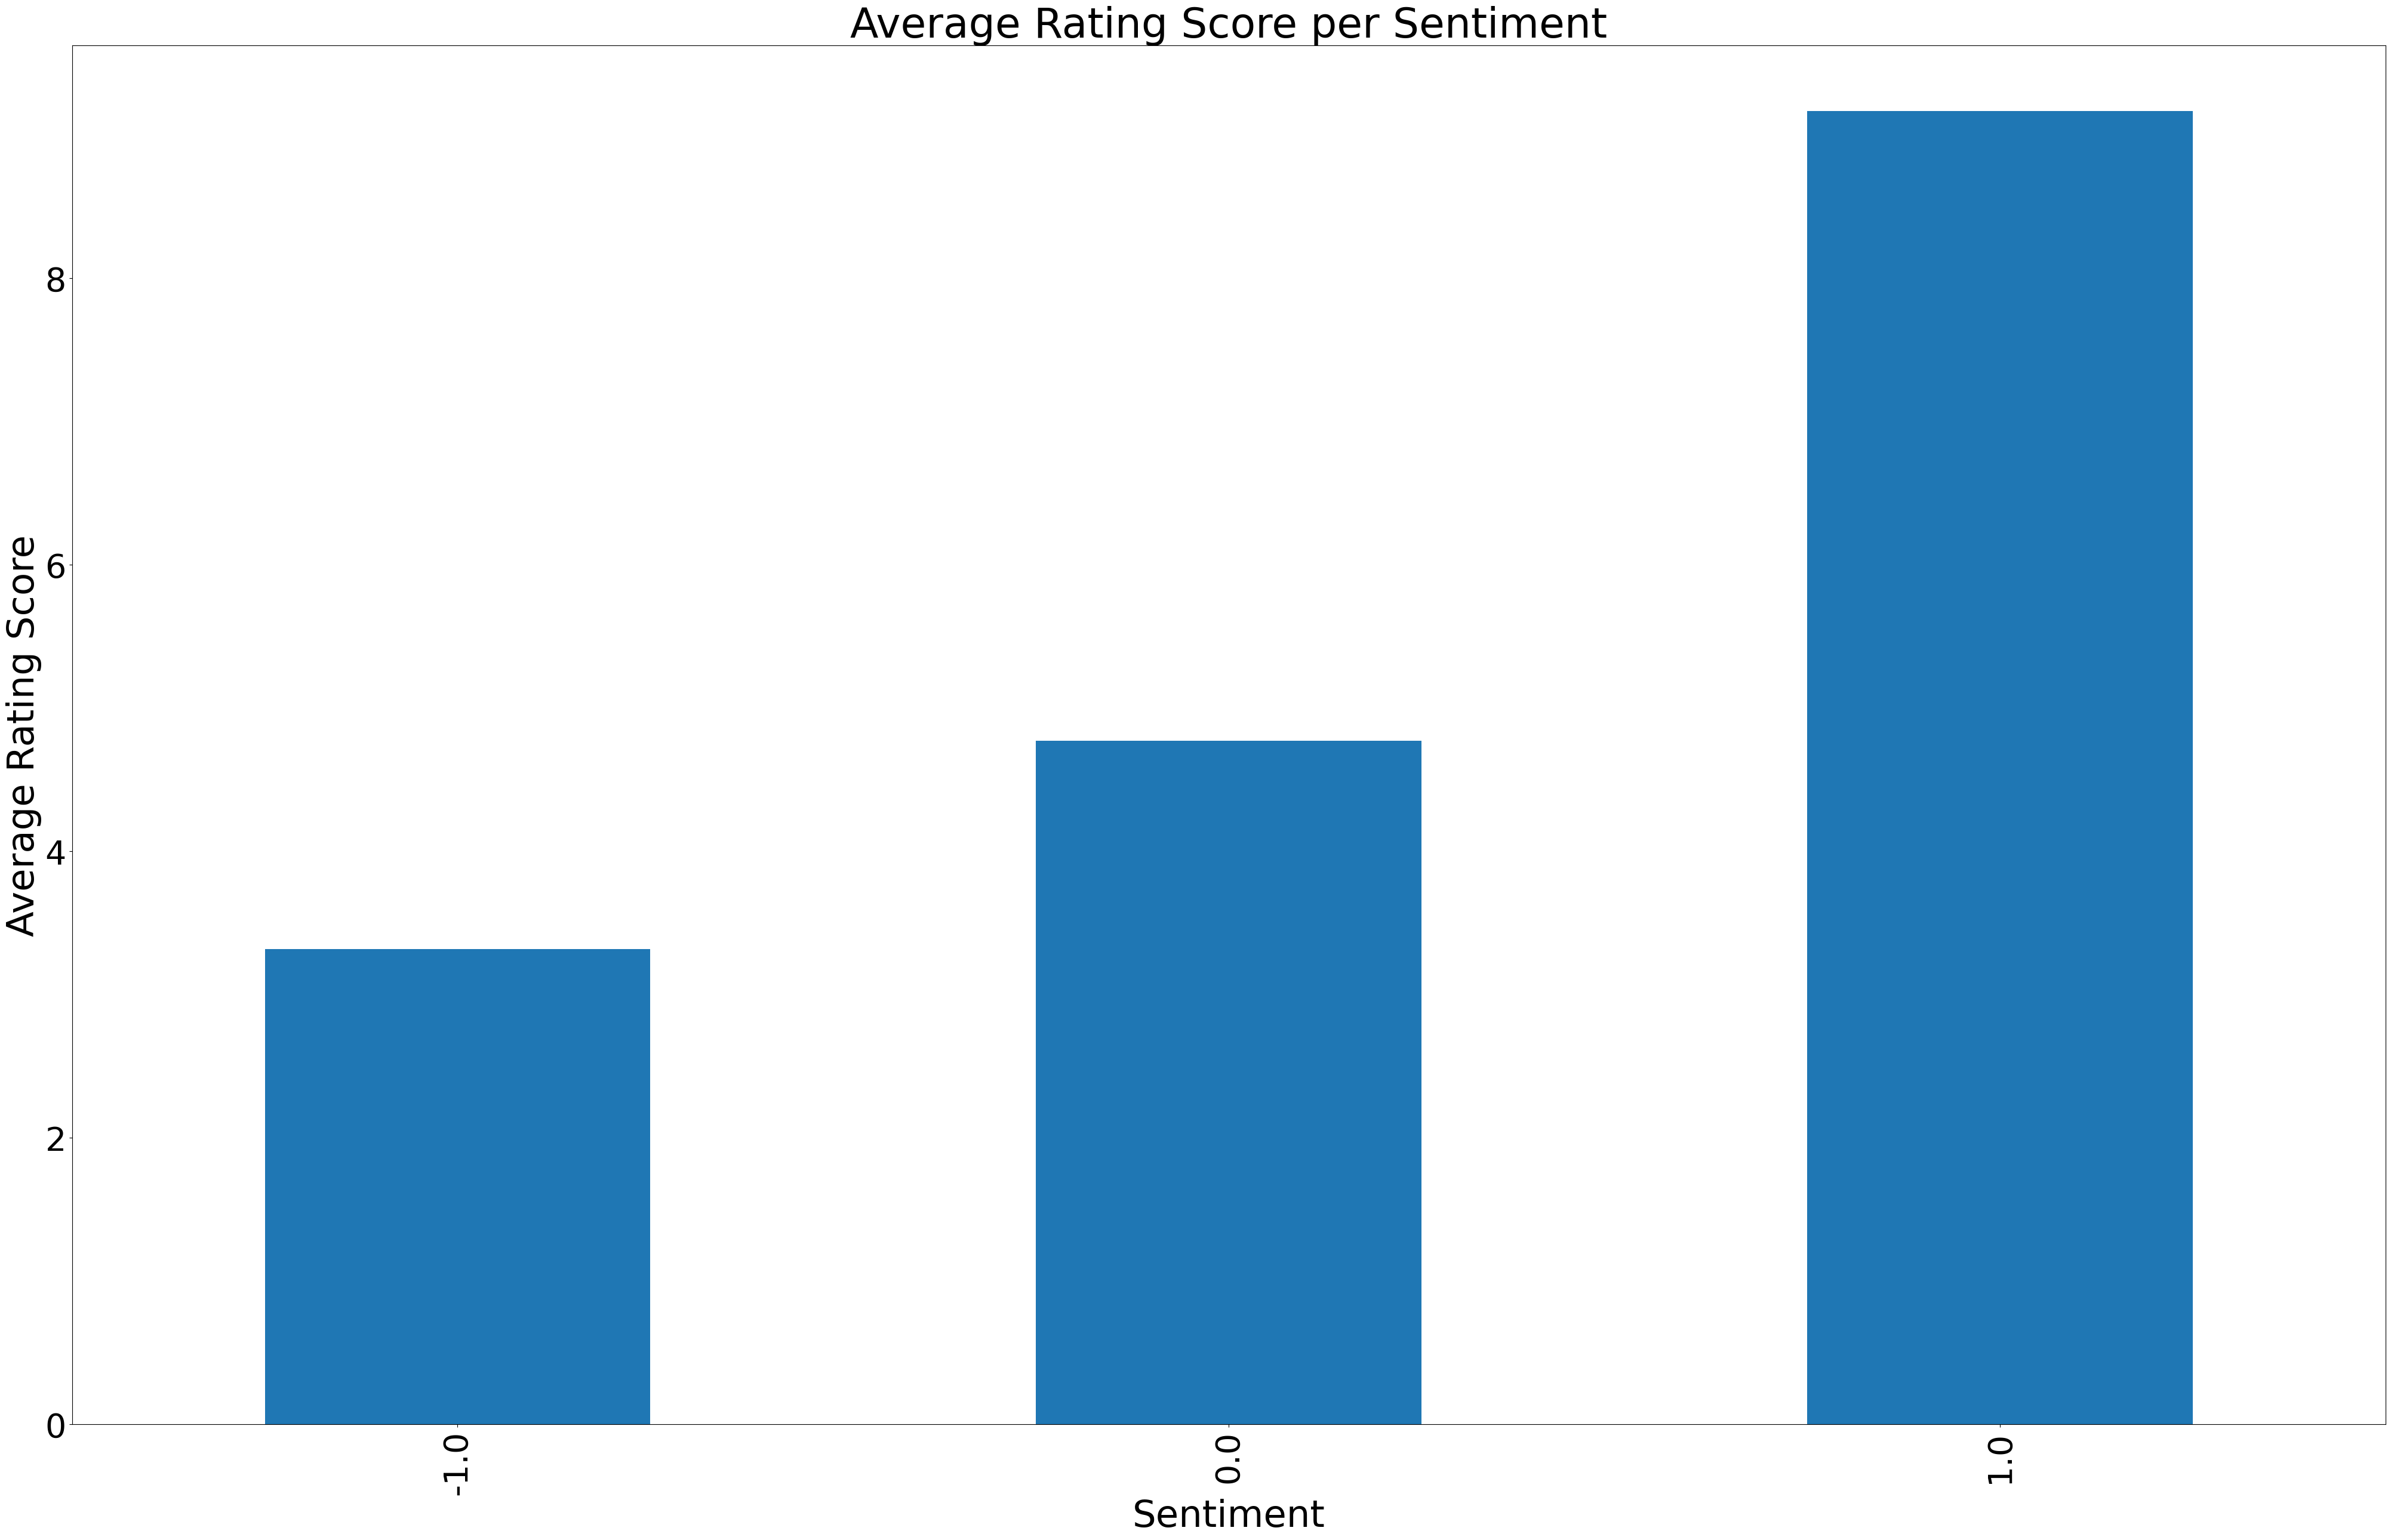

In [16]:
group_by_label_mean["Rate"].plot(kind='bar', figsize=(50,30))
plt.xlabel('Sentiment', fontsize=45)
plt.ylabel('Average Rating Score', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Rating Score per Sentiment', fontsize=50)
plt.show()

As expected, the average rating of positive reviews are higher than neutral and negative ratings, respectively.

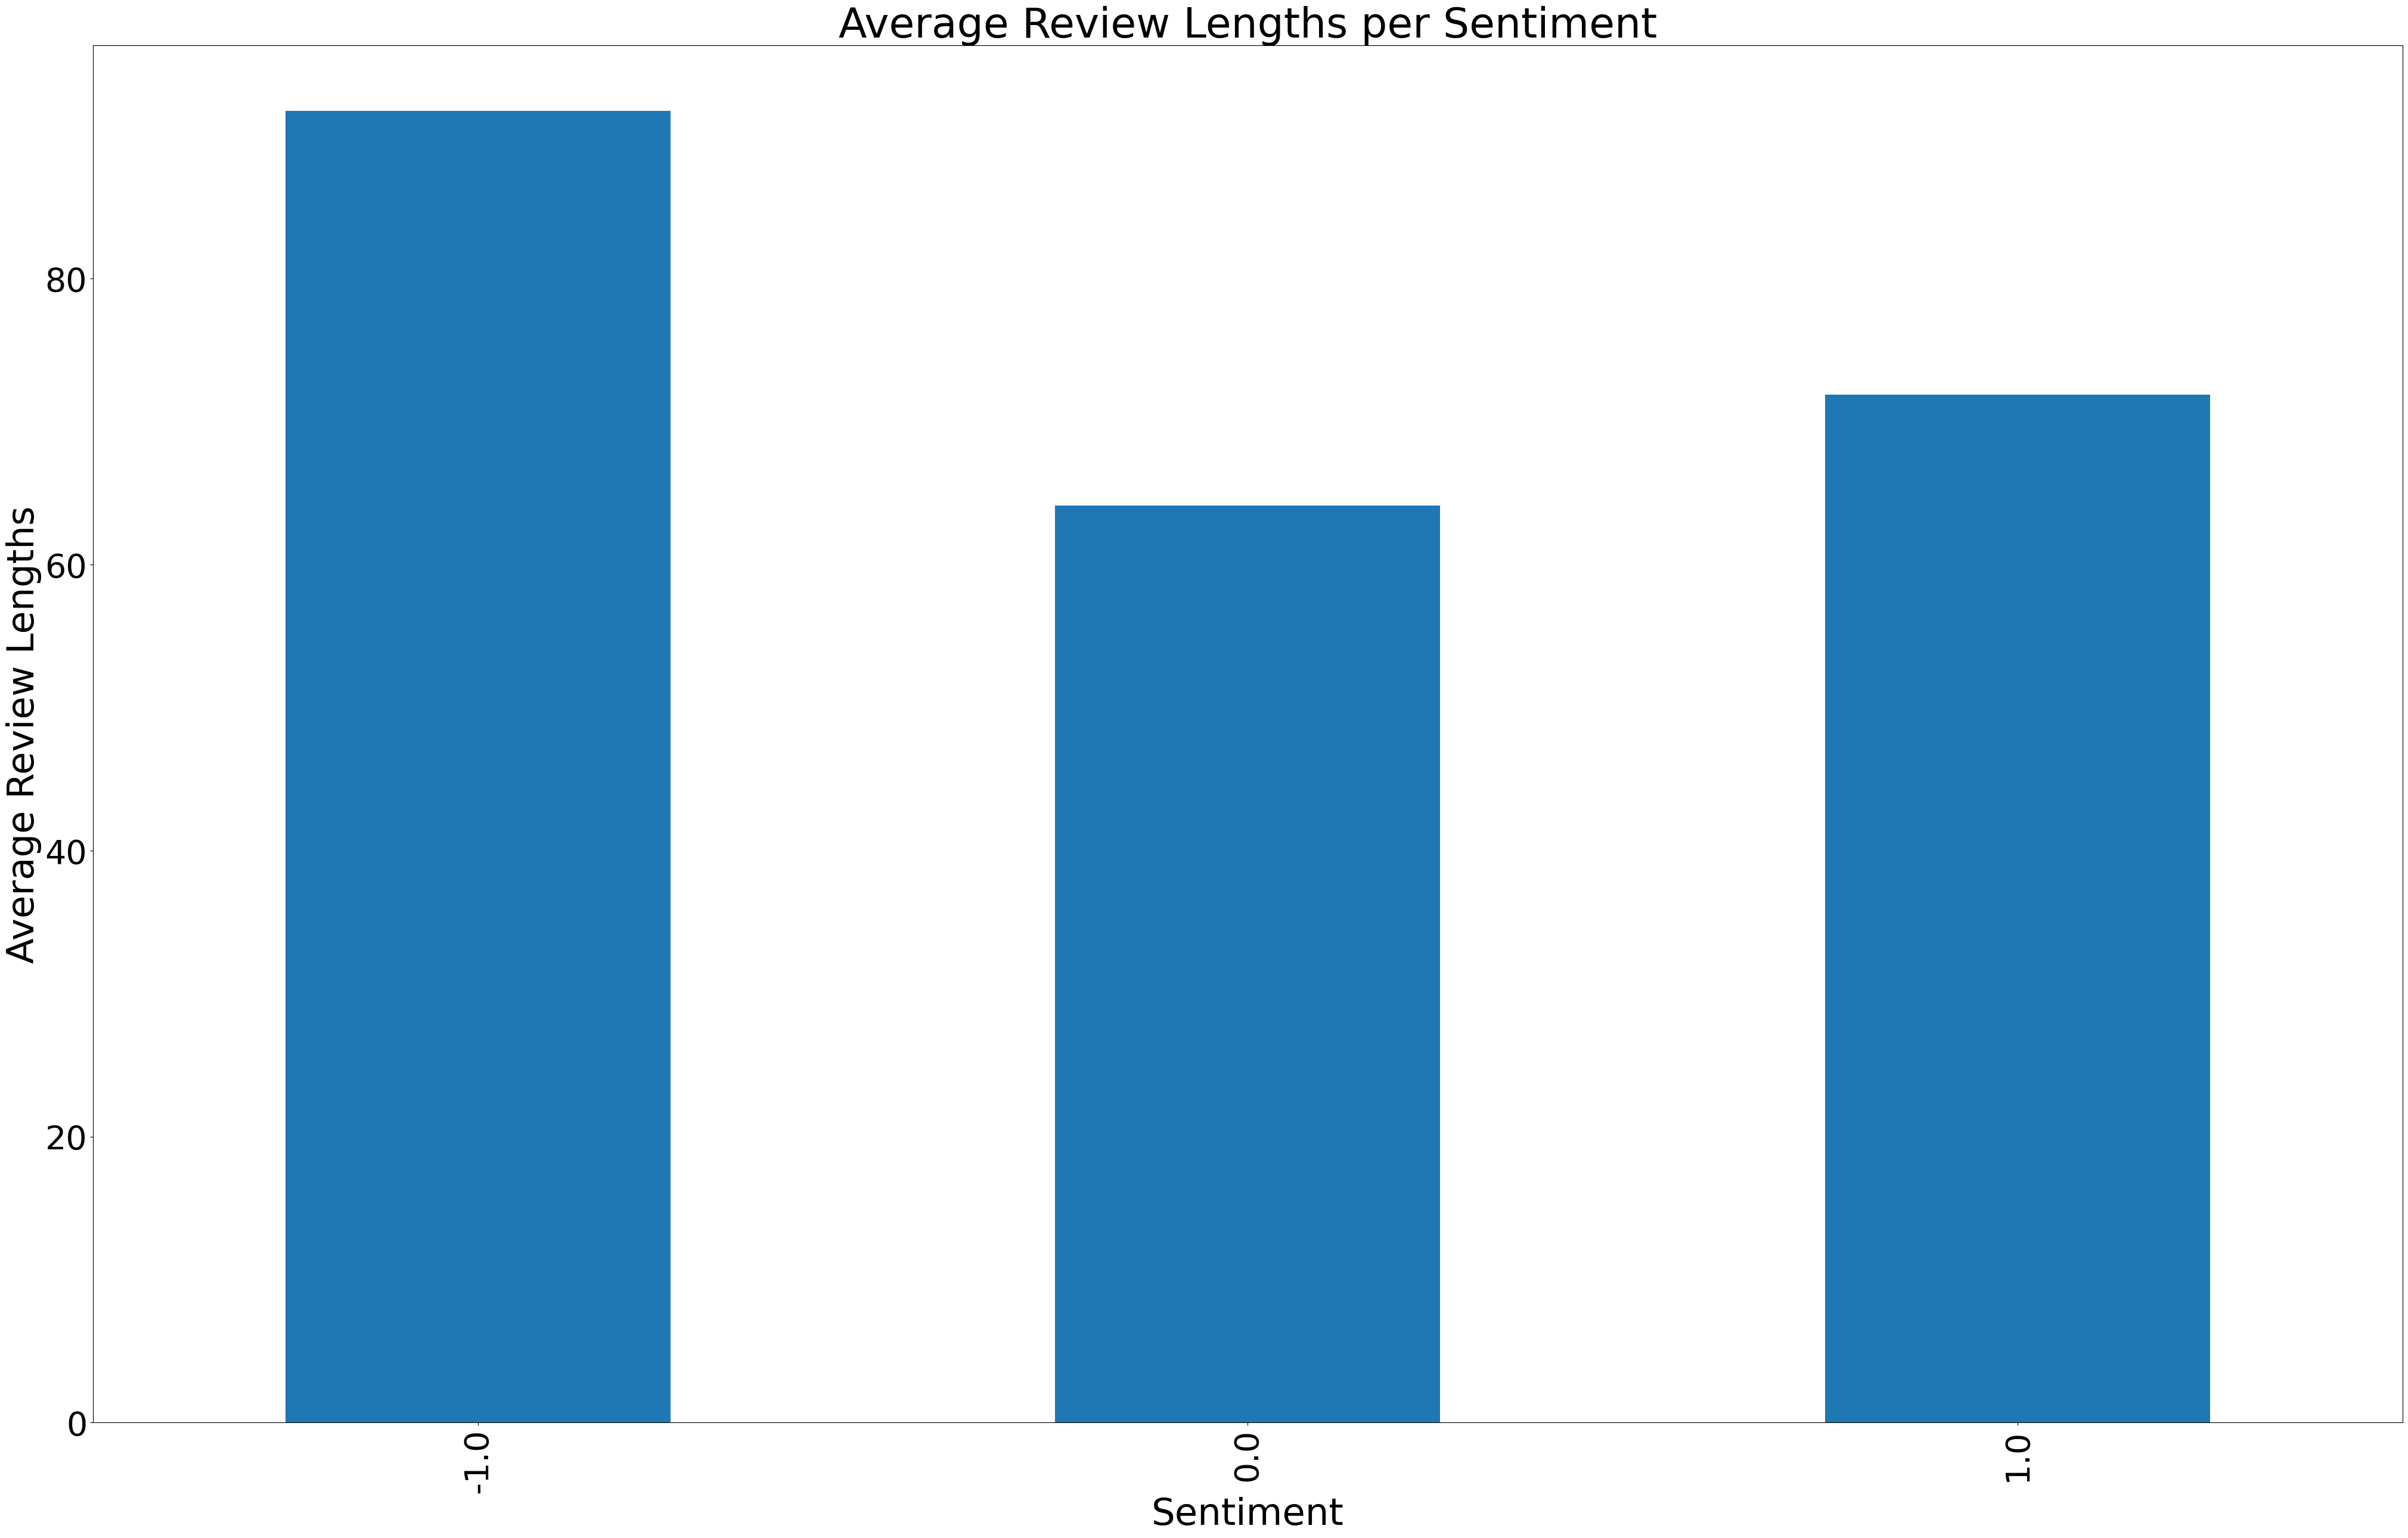

In [17]:
group_by_label_mean["Review Lengths"].plot(kind='bar', figsize=(50,30))
plt.xlabel('Sentiment', fontsize=45)
plt.ylabel('Average Review Lengths', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Review Lengths per Sentiment', fontsize=50)
plt.show()

In [18]:
df_groupby_label["Review Split"]

Average rating scores by reviewers is 9.16, 4.77, and 3.32 for positive, neutral, and negative scores respectively. Negative sentiment reviews have more words on average, while neutral reviews have the least.

In [19]:
group_by_review_words = df_groupby_label["Review Split"].apply(lambda x: FreqDist([a for b in x for a in b]).most_common(25))
display(group_by_review_words)

Label
-1.0    [(ăn, 4649), (thì, 4136), (mình, 3832), (có, 3...
 0.0    [(ăn, 1053), (có, 791), (thì, 771), (là, 757),...
 1.0    [(ăn, 3949), (là, 3200), (có, 2982), (và, 2885...
Name: Review Split, dtype: object

In [20]:
def plot_wordfreq_bargraph(data, sentiment):
    words, freq = list(zip(*data))
    plt.figure(figsize=(50,30))
    plt.bar(words, freq)
    plt.xlabel('Words', fontsize=50)
    plt.ylabel('Frequency of Words', fontsize=50)
    plt.yticks(fontsize=40)
    plt.xticks(rotation=60, fontsize=40)
    plt.title(f'Frequency of 25 Most Common Words for {sentiment} Sentiment', fontsize=60)
    plt.show()

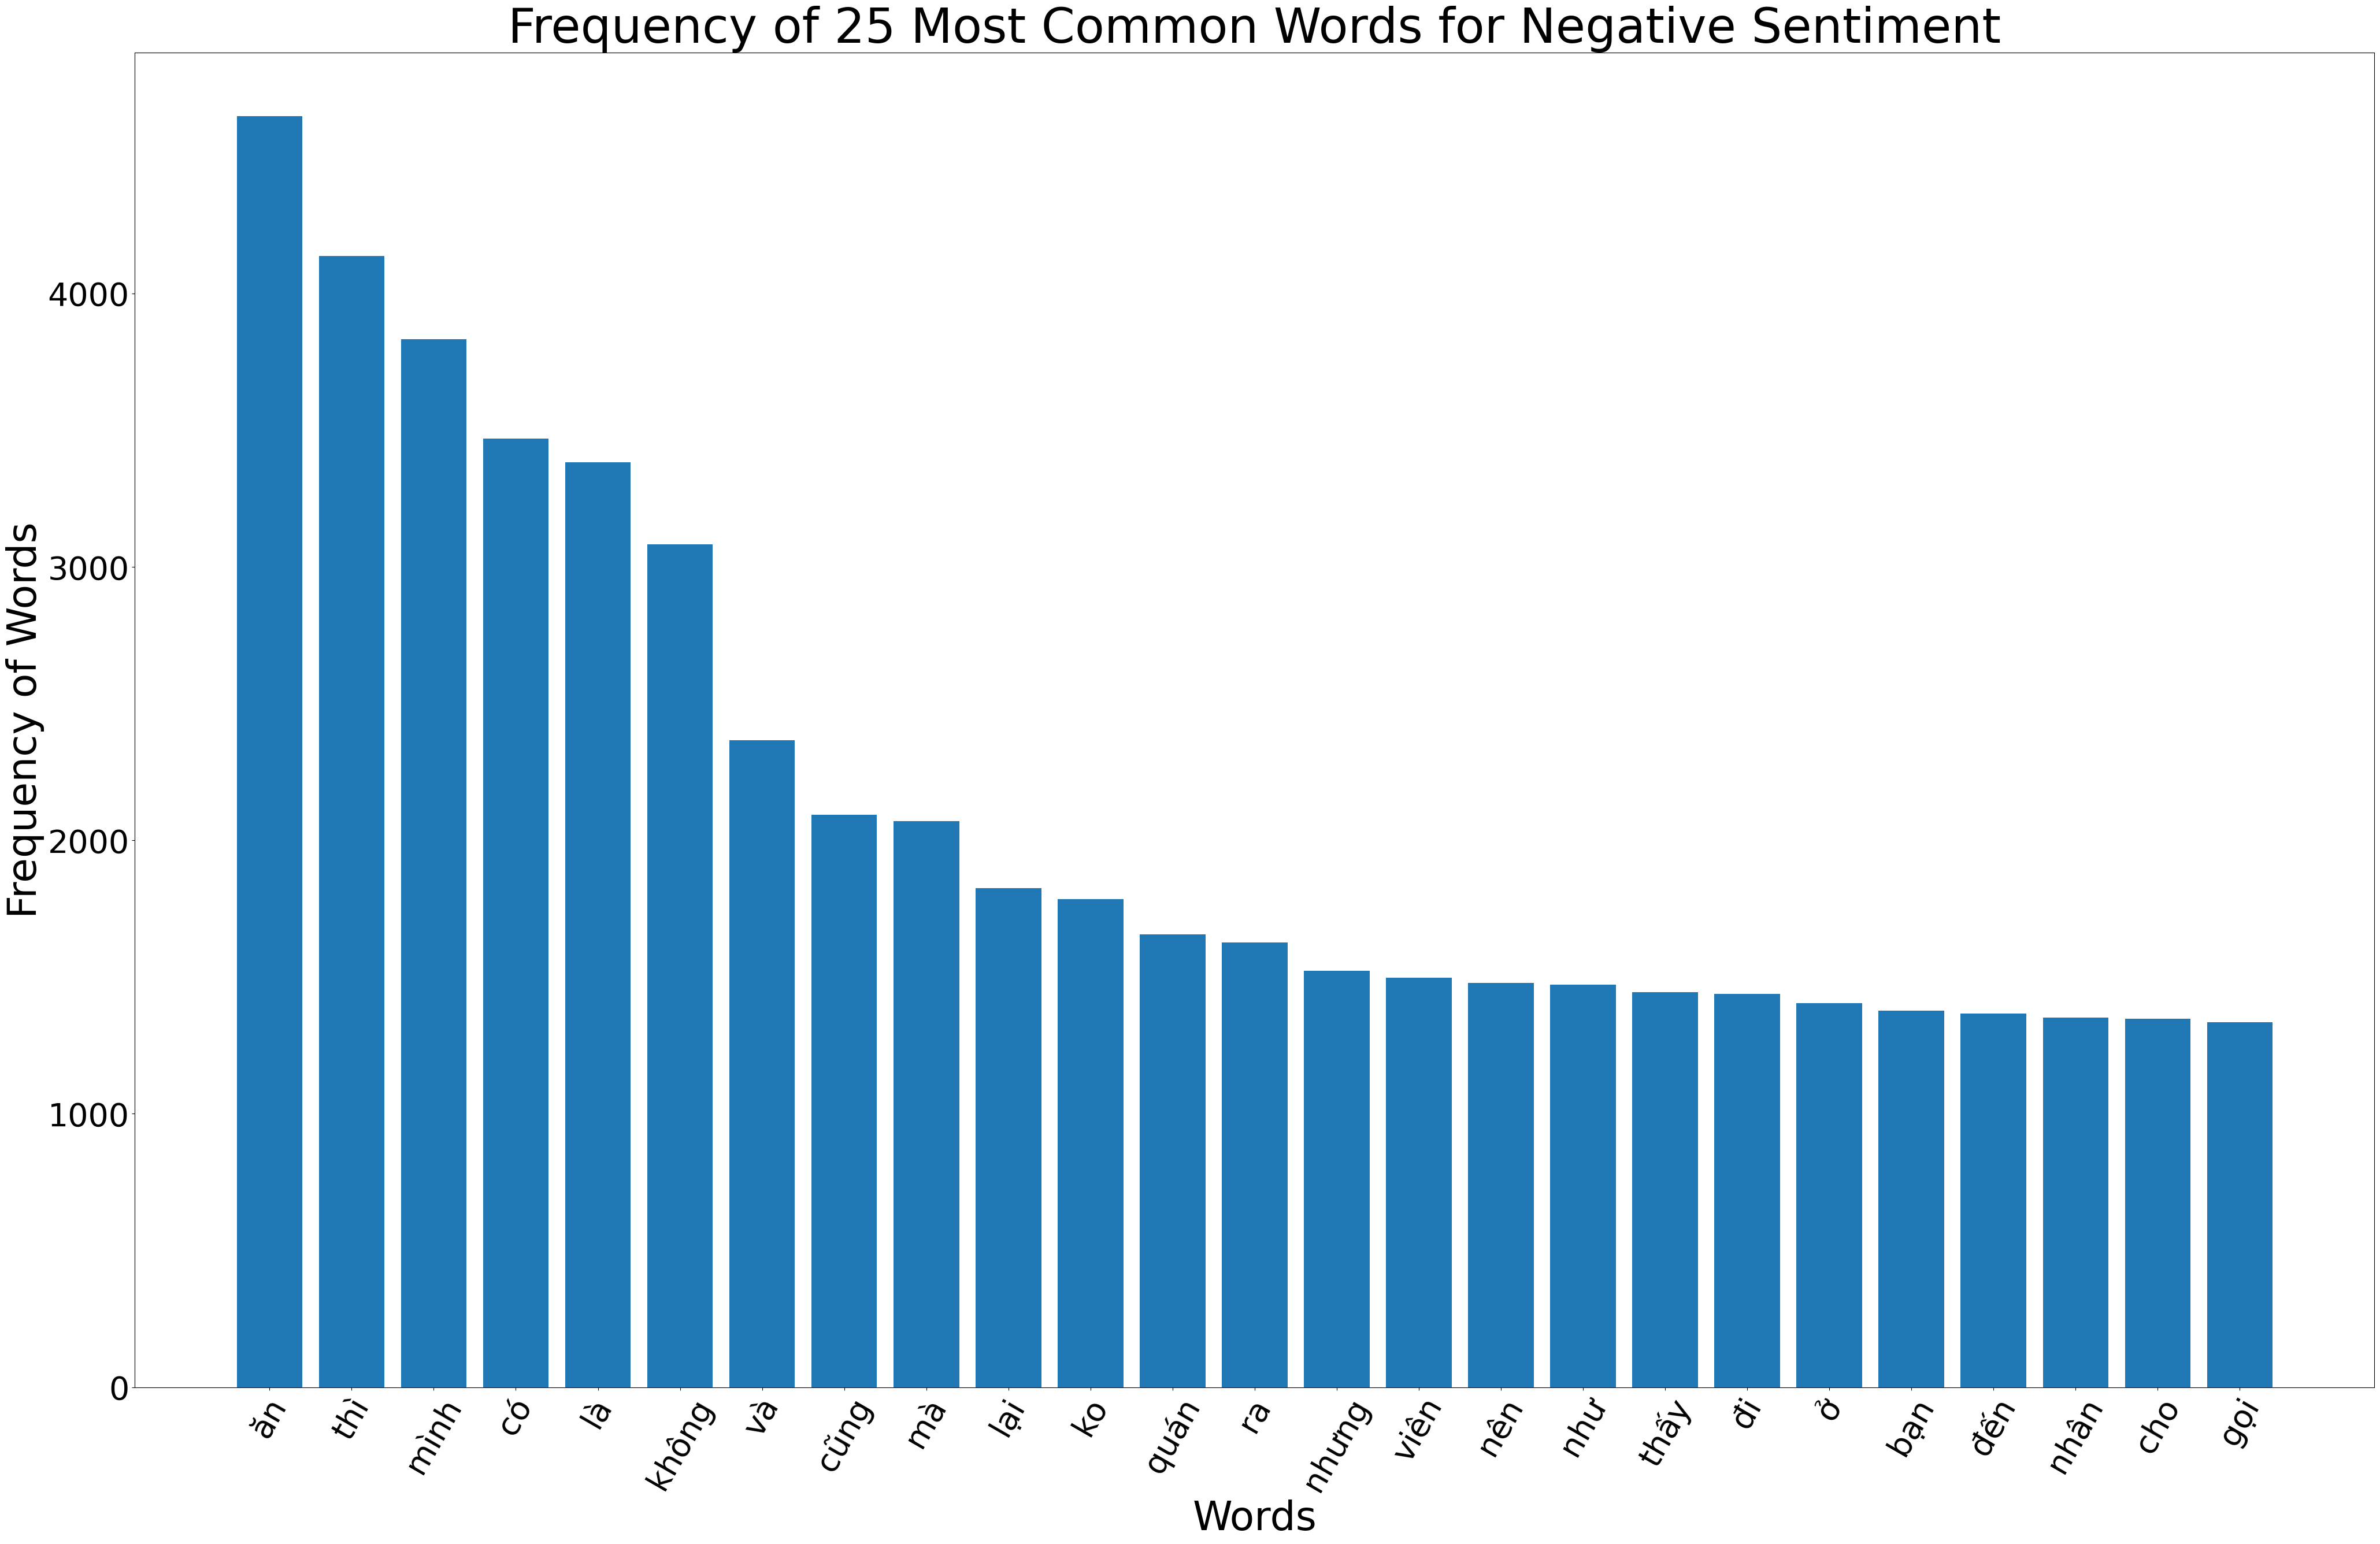

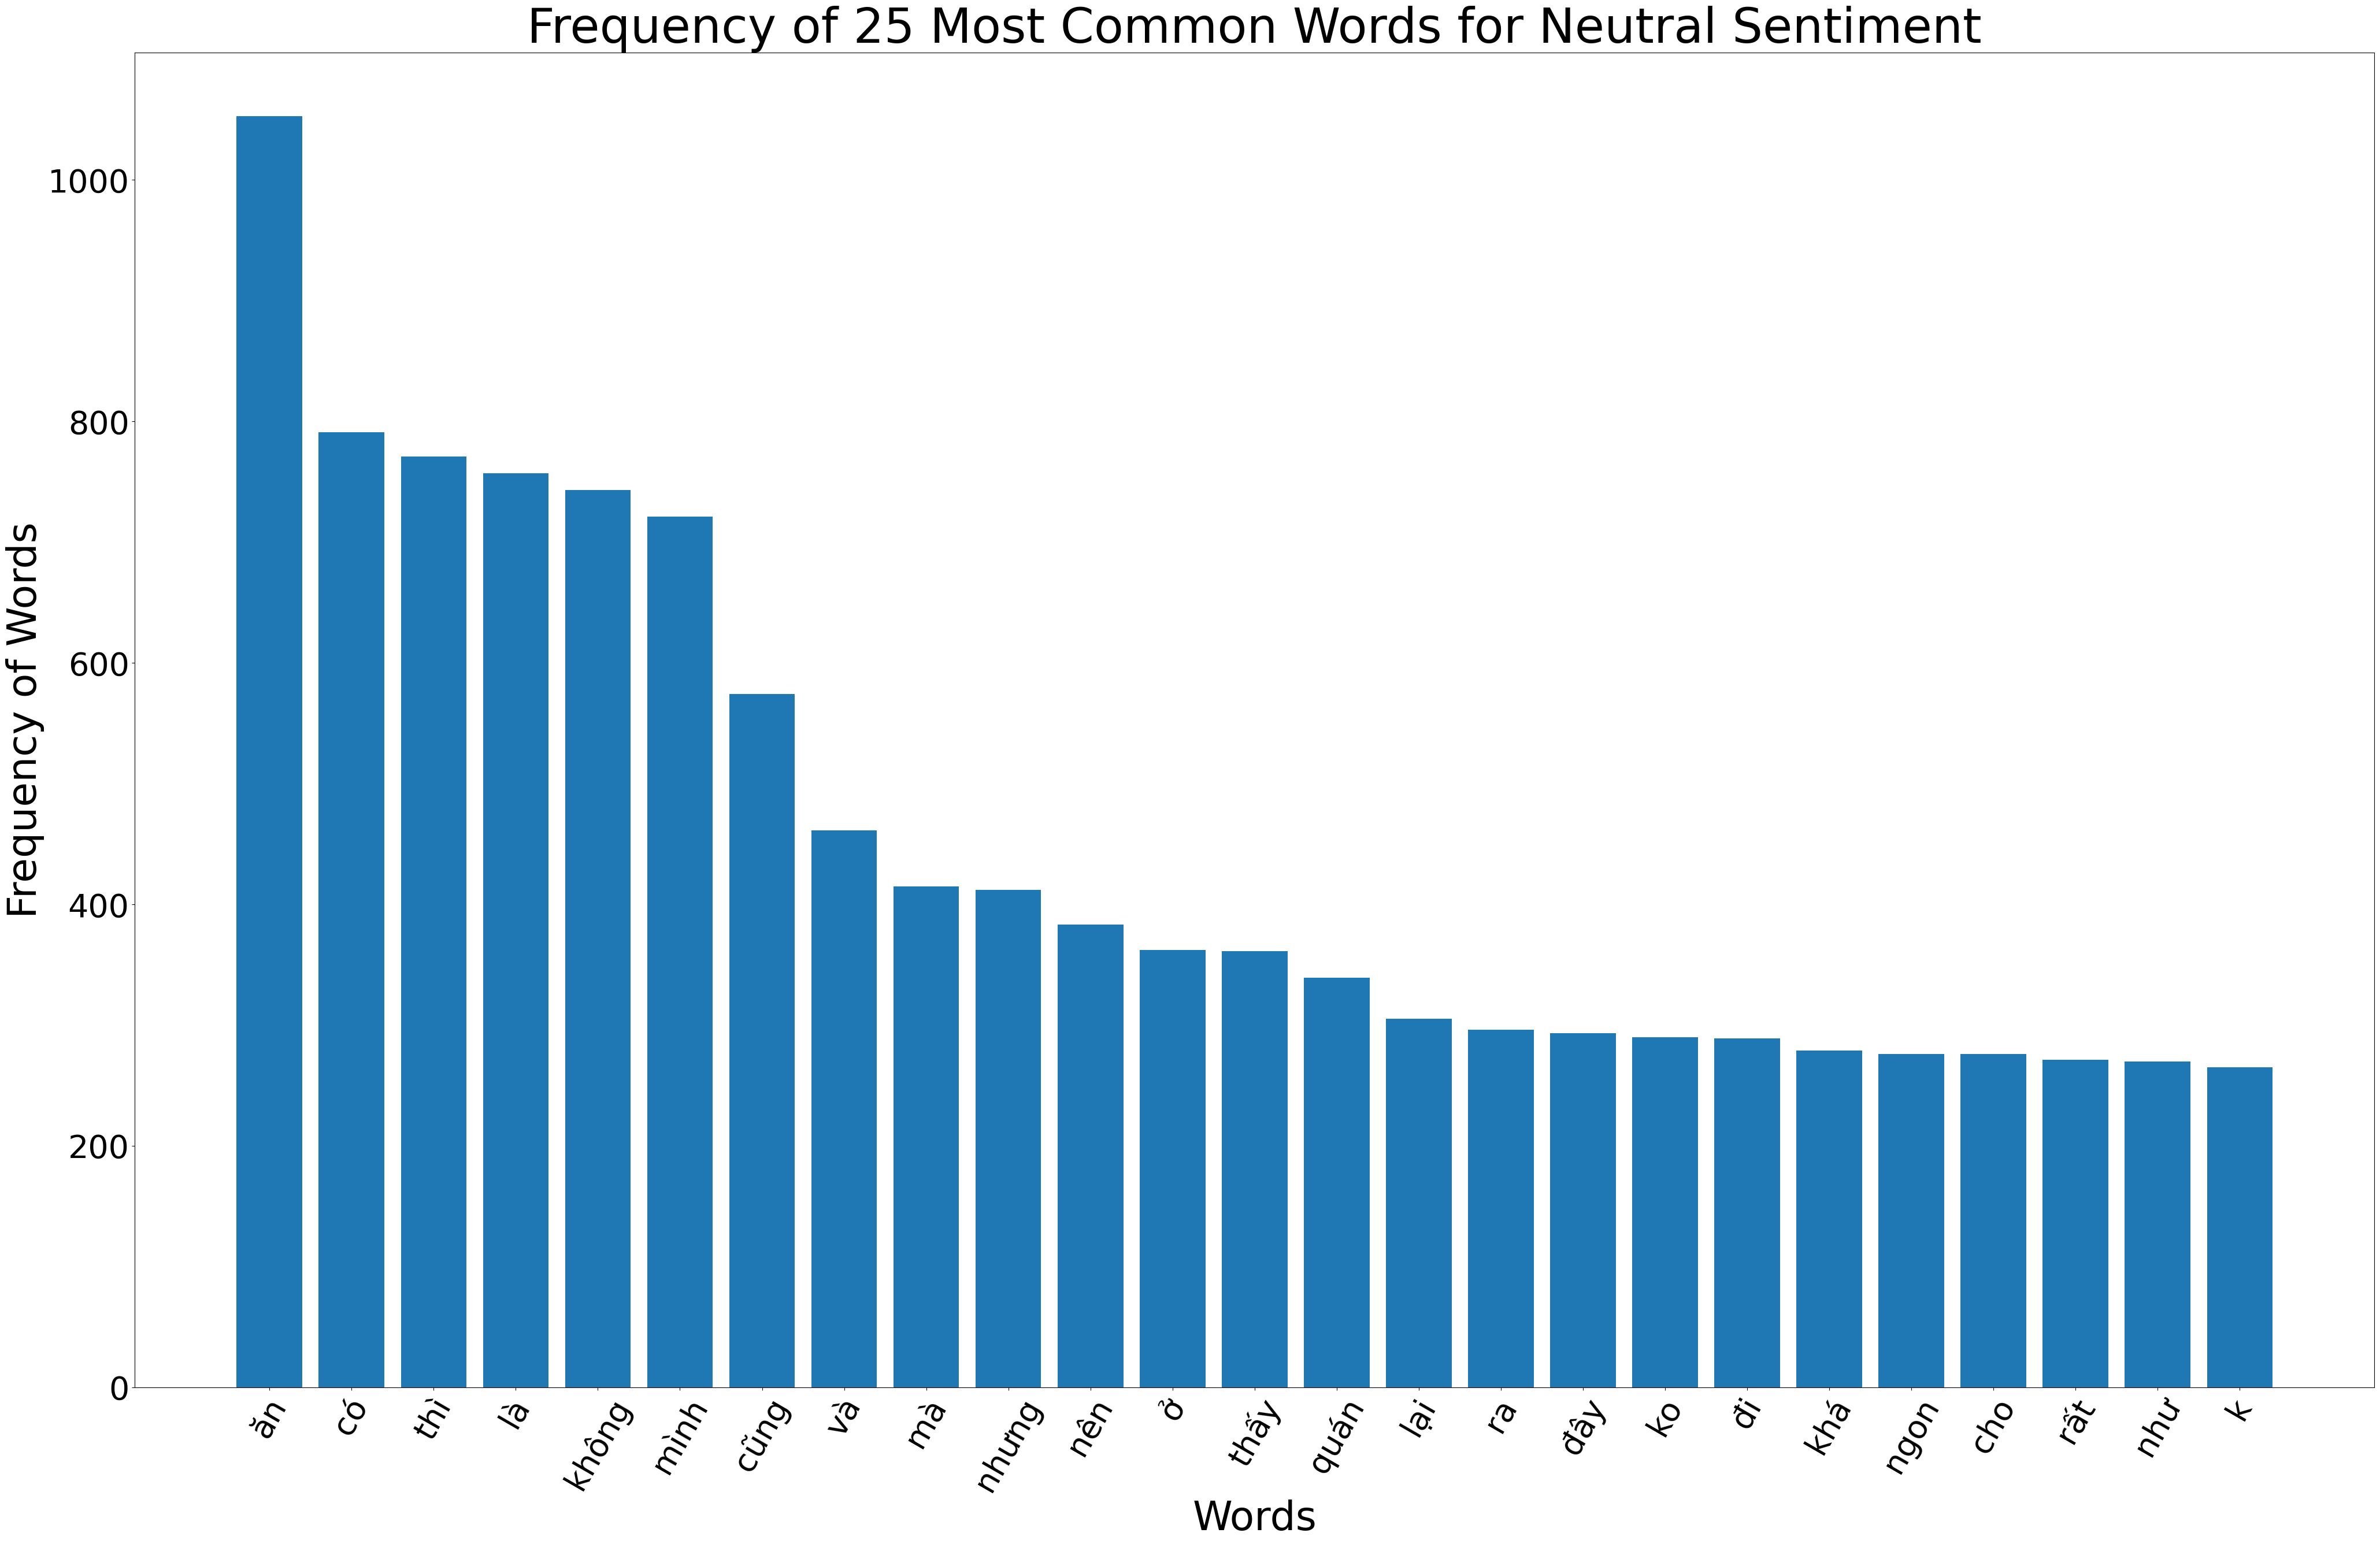

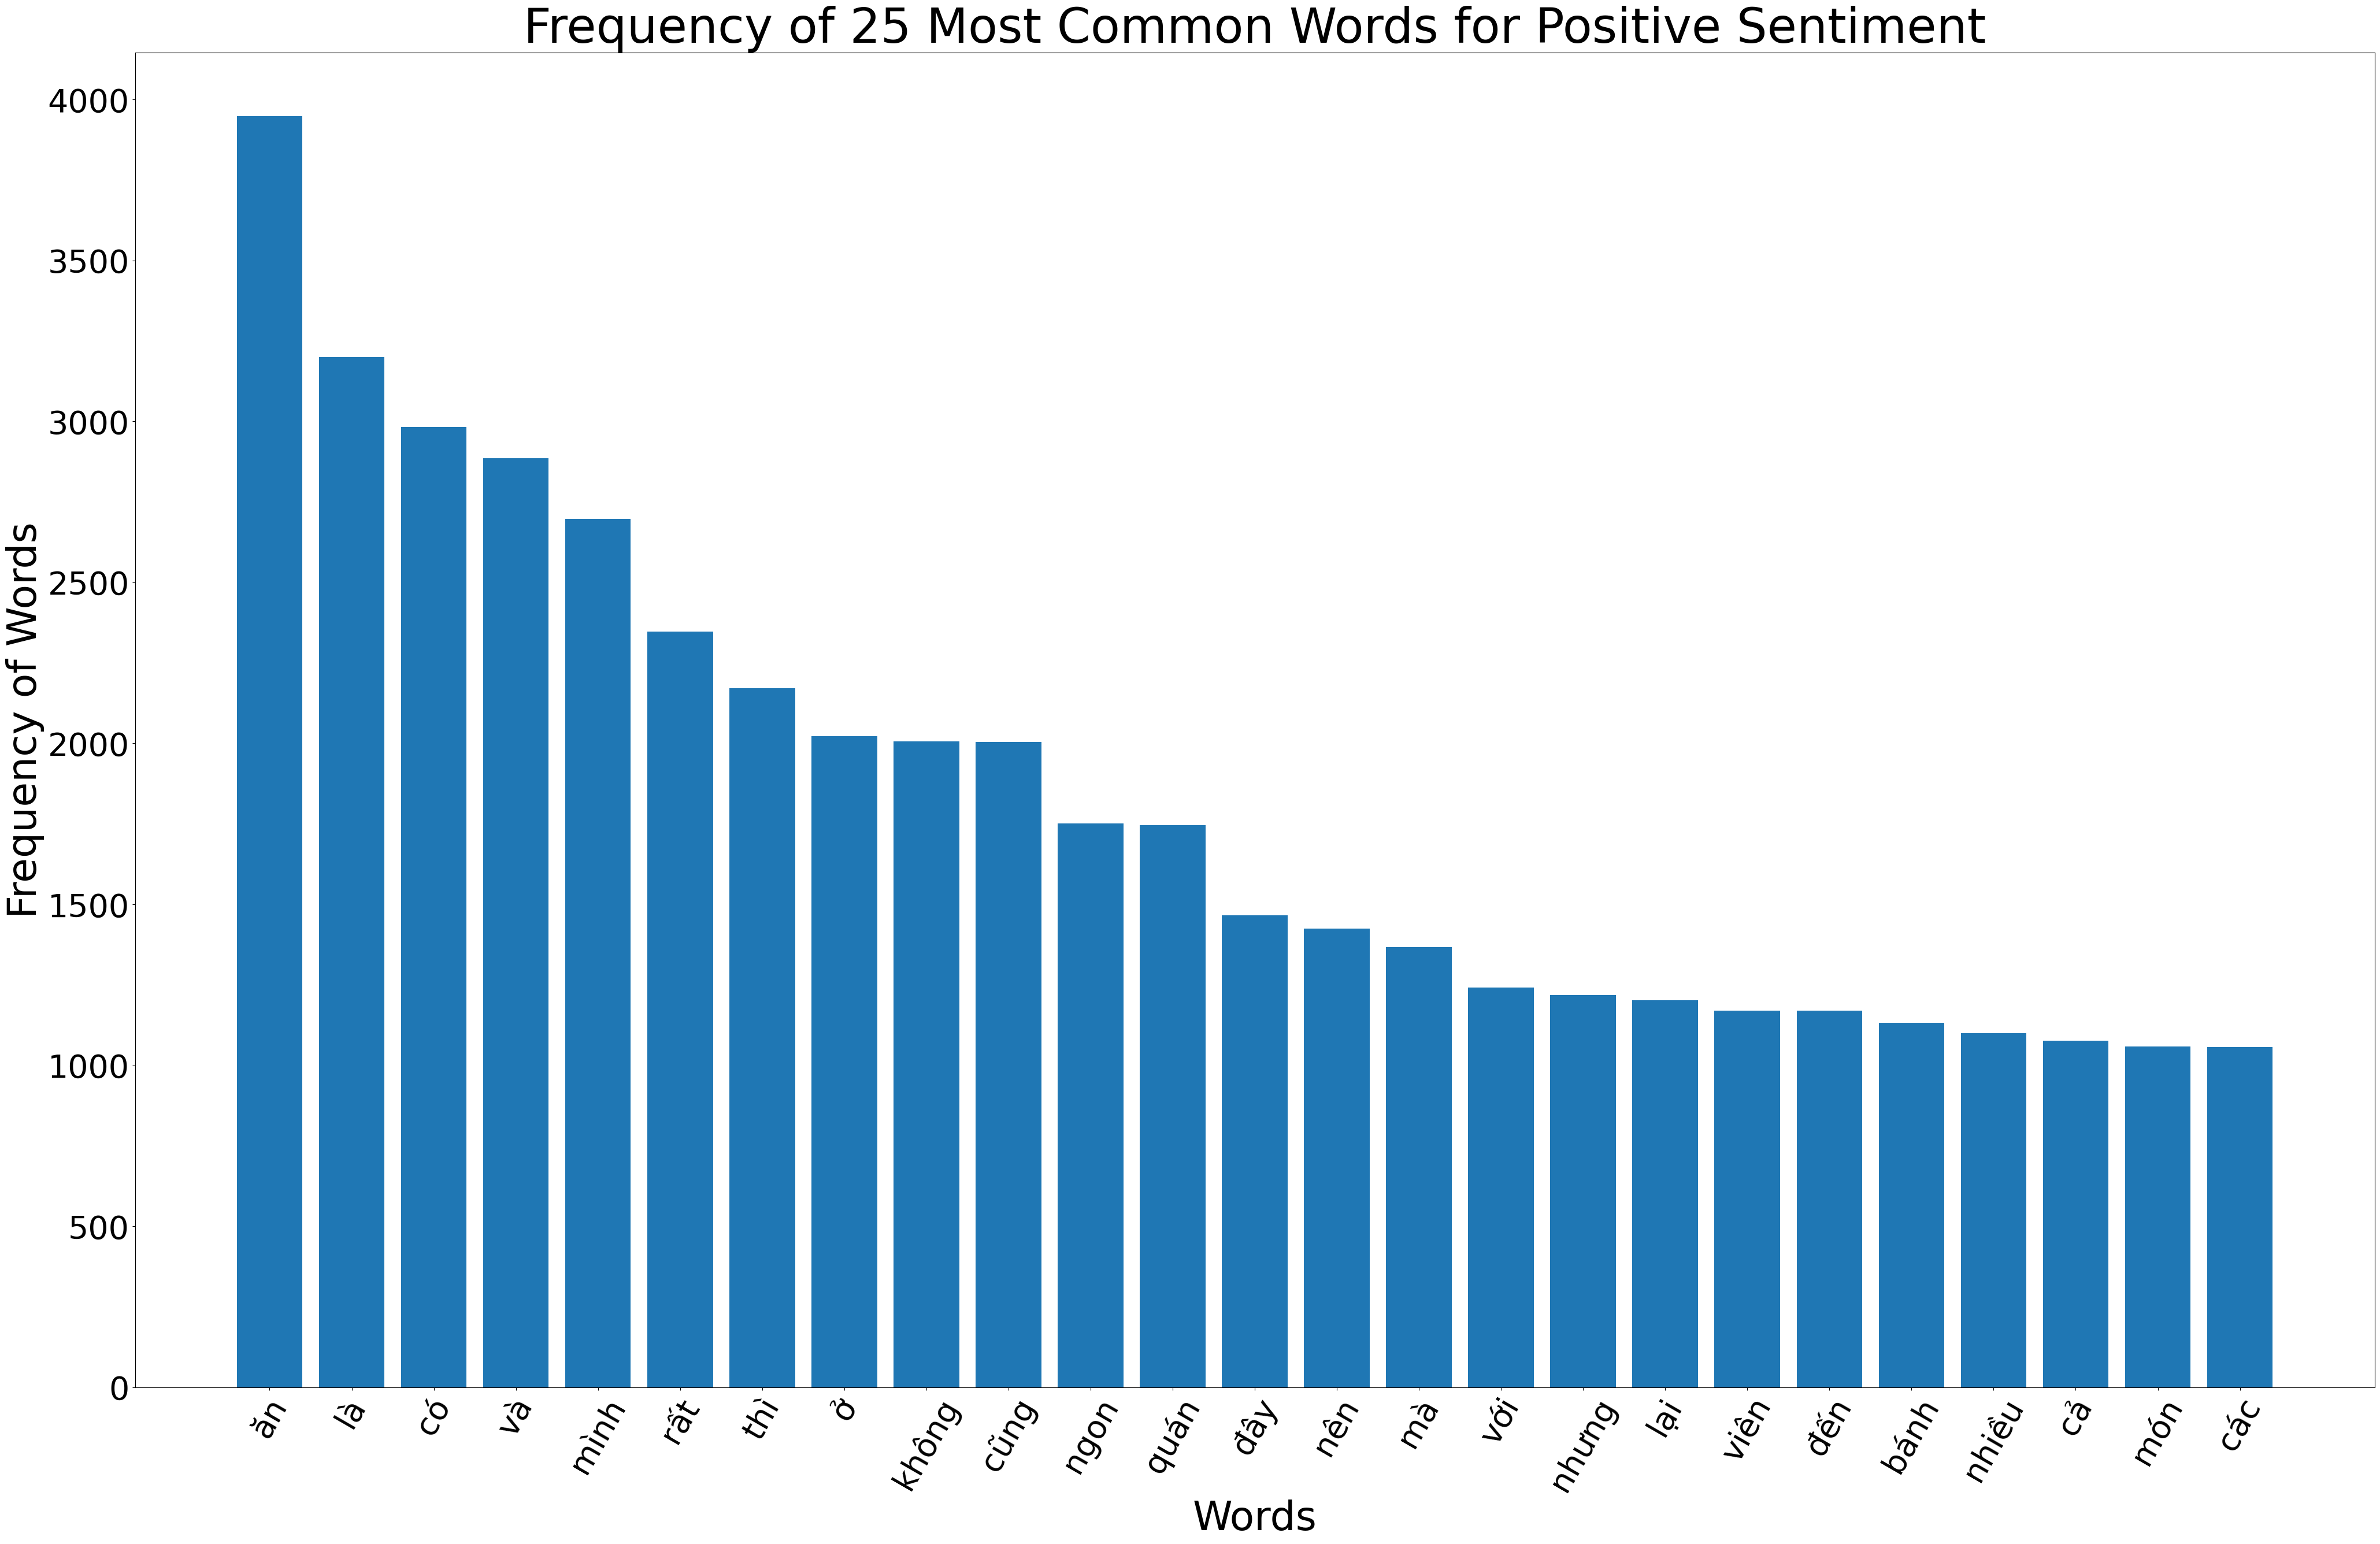

In [21]:
plot_wordfreq_bargraph(group_by_review_words.iloc[0], "Negative")
plot_wordfreq_bargraph(group_by_review_words.iloc[1], "Neutral")
plot_wordfreq_bargraph(group_by_review_words.iloc[2], "Positive")